## Using Scikit-Learn Neural Network MLPRegression to predict bitcoin pricing

Using bitcoin pricing data, try to make a prediction on the closing price of bitcoin.

This notebook is based on:

[Kaggle Dataset](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory)

[Kaggle Notebook](https://www.kaggle.com/adamaulia/bitcoin-forecasting-using-mlp-sklearn/notebook)


https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


https://www.kaggle.com/aashitiwari/prediction-of-cryptocurrencies-future-prices

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('../data/kaggle/bitcoin_price.csv',parse_dates=['Date'])

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [18]:
df.shape

(1760, 2)

In [11]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [12]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1755,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1756,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1757,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1758,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1759,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


For now we just want the date and the close price.  Reverse the order such that the oldest data is first.

In [25]:
df = df[['Date', 'Close']].sort_values(['Date'], ascending=True)
df.head(20)

,Date,Close
1759,2013-04-28,134.21
1758,2013-04-29,144.54
1757,2013-04-30,139.00
1756,2013-05-01,116.99
1755,2013-05-02,105.21
1754,2013-05-03,97.75
1753,2013-05-04,112.50
1752,2013-05-05,115.91
1751,2013-05-06,112.30
1750,2013-05-07,111.50


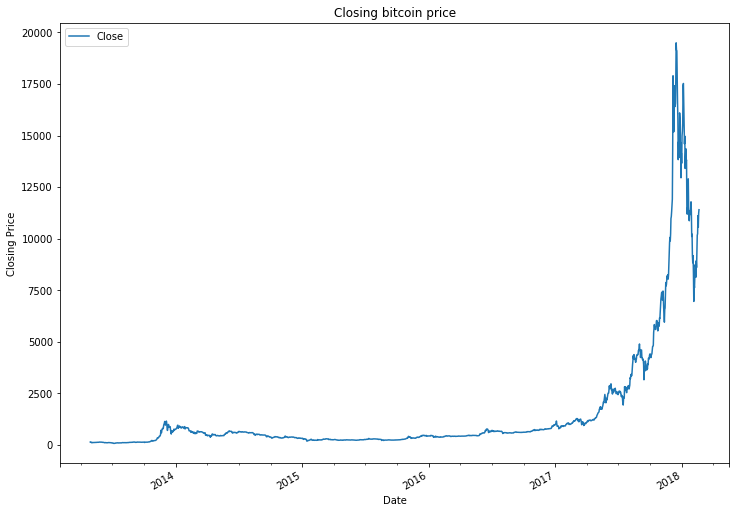

In [17]:
ax = df.plot(x="Date", y="Close", figsize=(12,9), title="Closing bitcoin price")
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")

ax.figure.autofmt_xdate()

In [19]:
#create historical data
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)


In [24]:
x, y = create_dataset(df['Close'])
print (x.shape)
print (y.shape)
print(x)

(1756, 3)
(1756,)
[[  134.21   144.54   139.  ]
 [  144.54   139.     116.99]
 [  139.     116.99   105.21]
 ...
 [ 9494.63 10166.4  10233.9 ]
 [10166.4  10233.9  11112.7 ]
 [10233.9  11112.7  10551.8 ]]


In [23]:
print(y)

[11112.7  10233.9  10166.4  ...   116.99   139.     144.54]
